In [109]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path='/content/drive/My Drive/Colab Notebooks/Agricultural crops image classification using CNN/Agricultural-crops'

In [110]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
# import required module
from PIL import Image
  
# get image
filepath = "/content/drive/My Drive/Colab Notebooks/Agricultural crops image classification using CNN/Agricultural-crops/almond/image (1).jpg"
img = Image.open(filepath)

In [112]:
# get width and height
width = img.width
height = img.height

In [113]:
# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)

The height of the image is:  183
The width of the image is:  275


In [114]:
import os

In [115]:
print(os.listdir(train_path))

['almond', 'chilli', 'Cherry', 'cotton', 'clove', 'cardamom', 'banana', 'Coffee-plant', 'Cucumber', 'coconut', 'maize', 'Pearl_millet(bajra)', 'Olive-tree', 'mustard-oil', 'Fox_nut(Makhana)', 'jute', 'jowar', 'gram', 'papaya', 'Lemon', 'pineapple', 'tea', 'sugarcane', 'tomato', 'wheat', 'soyabean', 'Tobacco-plant', 'rice', 'sunflower', 'vigna-radiati(Mung)']


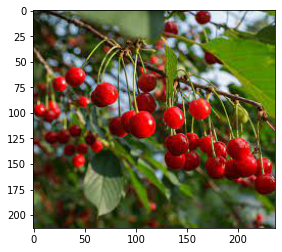

In [116]:
plt.imshow(plt.imread("/content/drive/My Drive/Colab Notebooks/Agricultural crops image classification using CNN/Agricultural-crops/Cherry/image15.jpeg"))

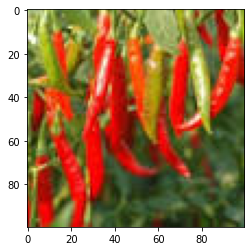

In [117]:
plt.imshow(plt.imread("/content/drive/My Drive/Colab Notebooks/Agricultural crops image classification using CNN/Agricultural-crops/chilli/image.jpeg"))

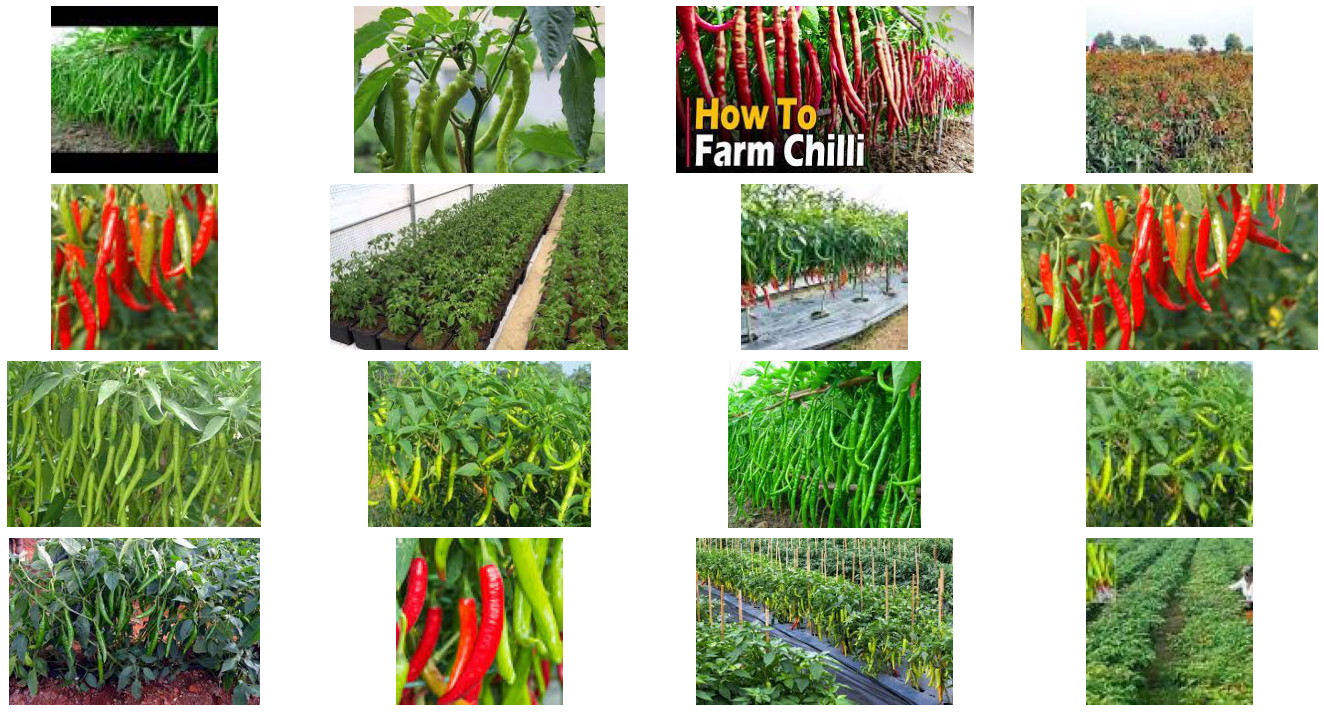

In [118]:
chilli = '/content/drive/My Drive/Colab Notebooks/Agricultural crops image classification using CNN/Agricultural-crops/chilli'
chilli_list = os.listdir(chilli)

plt.figure(figsize=(20, 10))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    img = plt.imread(os.path.join(chilli, chilli_list[i]))
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()

In [119]:
import cv2

def read_image(train_path):
    image = cv2.imread(train_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [120]:
# Intialize Generator 
from keras.preprocessing.image import ImageDataGenerator as ImgDataGen

gen = ImgDataGen(rescale=1/255, rotation_range=20, horizontal_flip=True, validation_split=0.25)

# Load Data 
train_ds = gen.flow_from_directory(train_path, 
                                   class_mode='binary', shuffle=True, batch_size=32, target_size=(256,256), subset='training')
valid_ds = gen.flow_from_directory(train_path, 
                                   class_mode='binary', shuffle=True, batch_size=32, target_size=(256,256), subset='validation')

Found 635 images belonging to 30 classes.
Found 194 images belonging to 30 classes.


In [121]:
from tensorflow.keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Load Pretrained Model
base_model = InceptionV3(include_top=False, input_shape=(256,256,3))
# other models : ResNet50V2, InceptionV1, InceptionV2, Xception

# Freeze Weights
base_model.trainable = False

87910968/87910968 [==============================] - 3s 0us/step


In [123]:
# Model Architecture
model = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.4),
    Dense(30, activation='softmax')
], name="Inception-TL")


In [124]:
# Compile Model 
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [125]:
# Callbacks 
cbs = [EarlyStopping(patience=3, restore_best_weights=True), ModelCheckpoint("Inception-TL.h5", save_best_only=True)]

In [127]:
# Model Training
history = model.fit(train_ds, validation_data=valid_ds, epochs=20, callbacks=cbs)

Epoch 1/20
20/20 [==============================] - 23s 1s/step - loss: 1.0651 - accuracy: 0.6945 - val_loss: 1.4439 - val_accuracy: 0.5876
Epoch 2/20
20/20 [==============================] - 19s 978ms/step - loss: 0.9257 - accuracy: 0.7370 - val_loss: 1.4038 - val_accuracy: 0.6082
Epoch 3/20
20/20 [==============================] - 20s 1s/step - loss: 0.8116 - accuracy: 0.7764 - val_loss: 1.4715 - val_accuracy: 0.5773
Epoch 4/20
20/20 [==============================] - 19s 981ms/step - loss: 0.7573 - accuracy: 0.7874 - val_loss: 1.3601 - val_accuracy: 0.6134
Epoch 5/20
20/20 [==============================] - 20s 1s/step - loss: 0.6661 - accuracy: 0.8173 - val_loss: 1.3389 - val_accuracy: 0.6186
Epoch 6/20
20/20 [==============================] - 20s 1s/step - loss: 0.5830 - accuracy: 0.8504 - val_loss: 1.2731 - val_accuracy: 0.6340
Epoch 7/20
20/20 [==============================] - 20s 989ms/step - loss: 0.5324 - accuracy: 0.8630 - val_loss: 1.2359 - val_accuracy: 0.6546
Epoch 8/20


In [10]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255,validation_split=0.25)

In [79]:
# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/Agricultural crops image classification using CNN/Agricultural-crops',
        target_size=(48, 48),
        batch_size=32,
        color_mode="grayscale",
        class_mode='categorical',
        subset='training')

Found 635 images belonging to 30 classes.


In [80]:
# Preprocess all test images
validation_generator = train_data_gen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/Agricultural crops image classification using CNN/Agricultural-crops',
        target_size=(48, 48),
        batch_size=32,
        color_mode="grayscale",
        class_mode='categorical',
        subset='validation')

Found 194 images belonging to 30 classes.


In [88]:
# create model structure
from keras.models import Sequential
pheumonia_detection_model = Sequential()

In [89]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
pheumonia_detection_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
pheumonia_detection_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
pheumonia_detection_model.add(MaxPooling2D(pool_size=(3, 3)))
pheumonia_detection_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
pheumonia_detection_model.add(Dropout(0.25))

In [90]:
pheumonia_detection_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
pheumonia_detection_model.add(MaxPooling2D(pool_size=(3, 3)))
pheumonia_detection_model.add(Dropout(0.25))
pheumonia_detection_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
pheumonia_detection_model.add(Dropout(0.25))

In [103]:
pheumonia_detection_model.add(Flatten())
pheumonia_detection_model.add(Dense(1024, activation='relu'))
pheumonia_detection_model.add(Dropout(0.5))
pheumonia_detection_model.add(Dense(30, activation='softmax'))

In [104]:
pheumonia_detection_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_30 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 dropout_21 (Dropout)        (None, 12, 12, 128)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 10, 10, 256)       295168    
                                                      

In [105]:
import cv2
cv2.ocl.setUseOpenCL(False)
from tensorflow.keras.optimizers import Adam

In [106]:
pheumonia_detection_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

In [107]:
# Train the neural network/model
pheumonia_model_info = pheumonia_detection_model.fit(
        train_generator,
        steps_per_epoch=635//32,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=194//32)

Epoch 1/2
19/19 [==============================] - 9s 452ms/step - loss: 3.4442 - accuracy: 0.0265 - val_loss: 3.3938 - val_accuracy: 0.0469
Epoch 2/2
19/19 [==============================] - 8s 435ms/step - loss: 3.4182 - accuracy: 0.0498 - val_loss: 3.3938 - val_accuracy: 0.0469


In [ ]:
import json
pheumonia_model_info.history.keys()

In [ ]:
plt.plot(pheumonia_model_info.history['accuracy'])
plt.plot(pheumonia_model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(pheumonia_model_info.history['loss'])
plt.plot(pheumonia_model_info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()